# ECON408: Computational Methods in Macroeconomics

Wealth Distribution, Multiplicative Processes, and Inequality

Jesse Perla (University of British Columbia)

# Overview

## Motivation and Materials

-   In this lecture, we will introduce multiplicative stochastic
    processes and their implications for wealth and income distributions
-   This will also let us explore heavy-tailed distributions and get a
    sense of when they will influence inequality

## Materials

-   Adapted from QuantEcon lectures coauthored with John Stachurski and
    Thomas J. Sargent
    -   [Wealth Distribution
        Dynamics](https://julia.quantecon.org/introduction_dynamics/wealth_dynamics.html)
-   A reference in the Python lectures by Stachurski and Sargent
    -   [Heavy-Tailed
        Distributions](https://intro.quantecon.org/heavy_tails.html)

In [1]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, BenchmarkTools
using Plots.PlotMeasures, StatsPlots
default(;legendfontsize=16, linewidth=2, tickfontsize=12,
         bottom_margin=15mm)

# Tails of Distributions

## Counter-CDFs

-   The counter-CDF is the probability that the value is above a certain
    value
-   It is the complement of the CDF $$
    \mathbb{P}(X > x) = 1 - \mathbb{P}(X \leq x)
    $$
-   Or, if there is a density $f(x)$, then $$
    \int_{x}^\infty f(x) dx
    $$

## CCDF for the Normal

-   The lognormal distribution is often used to model returns


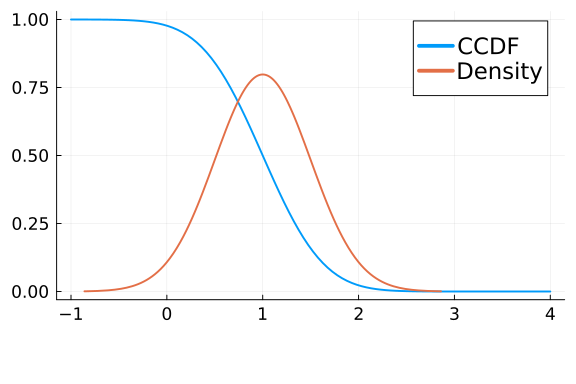

In [2]:
mu = 1.0
sigma = 0.5
dist = Normal(mu, sigma)
x = range(-1.0, 4.0, length = 100)
plot(x, 1 .- cdf(dist, x);
     label = "CCDF", size = (600, 400))
plot!(dist; label = "Density")

## CCDF for the LogNormal

-   The lognormal distribution is often used to model returns


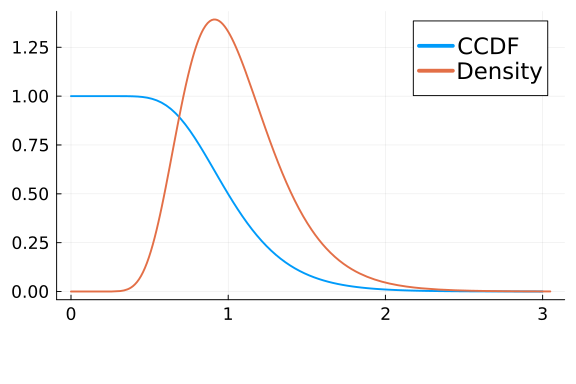

In [3]:
mu = -0.001
sigma = 0.3
dist = LogNormal(mu, sigma)
x = range(0.0, 3.0, length = 100)
plot(x, 1 .- cdf(dist, x);
     label = "CCDF", size = (600, 400))
plot!(dist; label = "Density")

## The Pareto Distribution

-   Those distributions have relatively few large (or small) values
-   The Pareto distribution has a heavy tail
    -   It is often used to model wealth, city sizes, and other
        phenomena where there are many small values and a few large ones
-   The density, given min-value $x_m$ and a shape parameter $\alpha$ $$
    f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}}
    $$
-   CDF is $F(x) = 1 - \left(\frac{x}{x_m}\right)^{-\alpha}$, CCDF =
    $\left(\frac{x}{x_m}\right)^{-\alpha}$

## CCDF for the Pareto with $\alpha = 2.5$

-   As you can see, the CCDF drops fairly slowly

mean(dist) = 1.6666666666666667
var(dist) = 2.2222222222222223


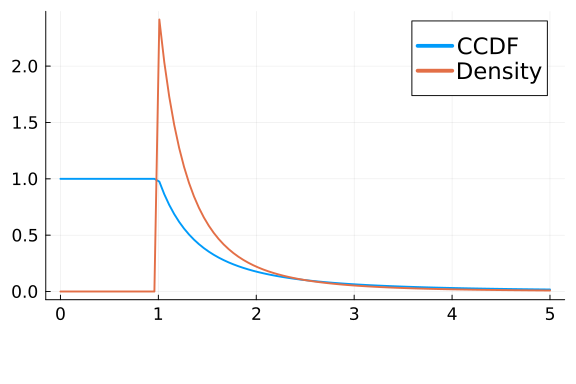

In [4]:
x_m = 1.0
alpha = 2.5
x = range(0.0, 5.0, length = 100)
dist = Pareto(alpha, x_m)
@show mean(dist)
@show var(dist)
plot(x, 1 .- cdf(dist, x);
     label = "CCDF", size = (600, 400))
plot!(x, dist; label = "Density")

## CCDF for the Pareto with $\alpha = 1.0$

-   With a smaller $\alpha$ it is even heavier tailed, and doesn’t have
    a variance

mean(dist) = 100.99999999999991
var(dist) = Inf


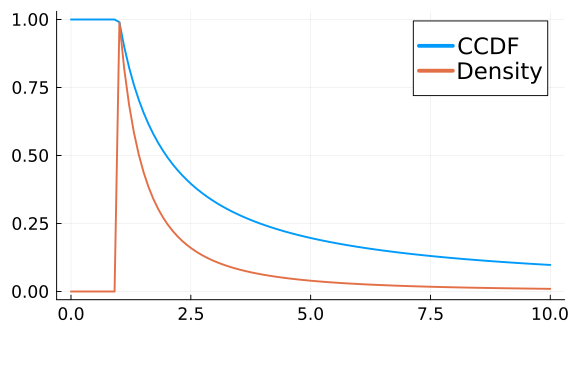

In [5]:
x_m = 1.0
alpha = 1.01
x = range(0.0, 10.0, length = 100)
dist = Pareto(alpha, x_m)
@show mean(dist)
@show var(dist)
plot(x, 1 .- cdf(dist, x);
     label = "CCDF", size = (600, 400))
plot!(x, dist; label = "Density")

## Log-Log Plots

-   The CCDF is often plotted on a log-log scale. i.e. $\log(x)$
    vs. $\log(1 - F(x))$

-   Taking the log of the probability lets us see the speed that the
    tail drops off

-   For the Pareto distribution, the CCDF is $$
    \left(\frac{x}{x_m}\right)^{-\alpha}
    $$

    -   Taking the log of this gives $$
        \alpha \log(x_m) - \alpha \log(x)
        $$

## Log-Log Plot for the Pareto


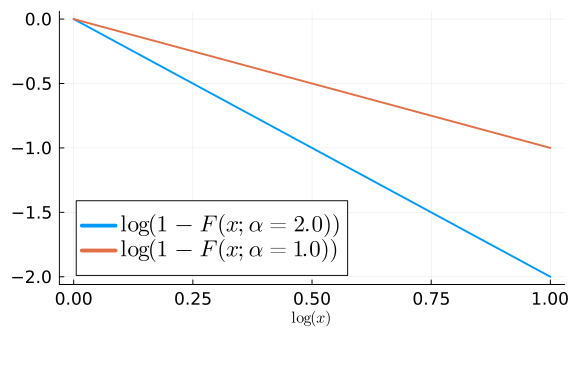

In [6]:
x_m = 1.0
x = range(1.0, exp(1), length = 100)
plot(log.(x),
     log.(1 .- cdf(Pareto(2.0, x_m), x));
     label = L"\log(1-F(x;\alpha=2.0))",
     xlabel = L"\log(x)", size = (600, 400),
     legend = :bottomleft)
plot!(log.(x),
     log.(1 .- cdf(Pareto(1.0, x_m), x));
     label = L"\log(1-F(x;\alpha=1.0))")

## Log-Log Plot for LogNormal vs. Pareto


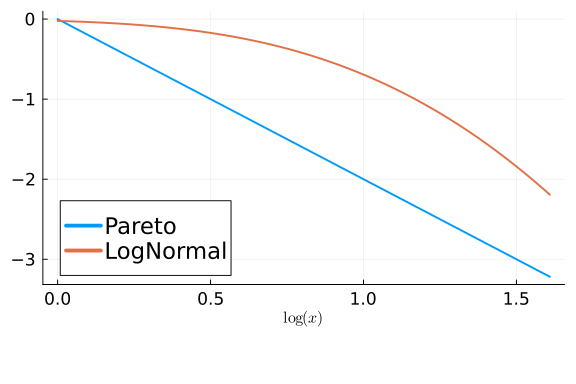

In [7]:
x_m = 1.0
x = range(1.0, 5, length = 100)
plot(log.(x),
     log.(1 .- cdf(Pareto(2.0, x_m), x));
     label = "Pareto",
     xlabel = L"\log(x)", size = (600, 400),
     legend = :bottomleft)
plot!(log.(x),
     log.(1 .- cdf(LogNormal(1.0, 0.5), x));
     label = "LogNormal")

## Heavy Tailed Distributions

-   See [Heavy-Tailed
    Distributions](https://intro.quantecon.org/heavy_tails.html) by
    Stachurski and Sargent for more
-   We previously looked at the LLN and Monte Carlo methods for
    calculating functions of a distribution from samples
-   Crucial in these was a question of whether a particular distribution
    had a particular moment.
    -   e.g. for the Cauchy distribution, the mean does not even exist

## Power-Law Tails

-   The Pareto distribution is a special case of a power-law
    distribution
-   A power-law distribution asymptomatically behaves like a Pareto
    distribution, with some $\alpha$ tail parameter.
    i.e. $\mathbb{P}(X > x) \propto x^{-\alpha}$ for large $x$
-   More formally, there exists some $c$ and some $\alpha > 0$ such that
    $$
    \lim_{x\to\infty} x^{\alpha} \mathbb{P}(X > x) = c
    $$

## Failures of LLNs?

-   For power-law tails, you may find that the not all moments exist
-   In particular, for a Power-law distribution, there are only moments
    for $k < \alpha$
    -   For example, with $\alpha = 1$ the mean and variance don’t exist
    -   For $\alpha = 1.8$ the mean exists, but the variance doesn’t
-   Of course, with finite data you will always be able to find a mean
    and variance, but with more data you may see them diverge

## Example with Pareto and $\alpha = 3$

var(dist) + mean(dist) ^ 2 = 3.0


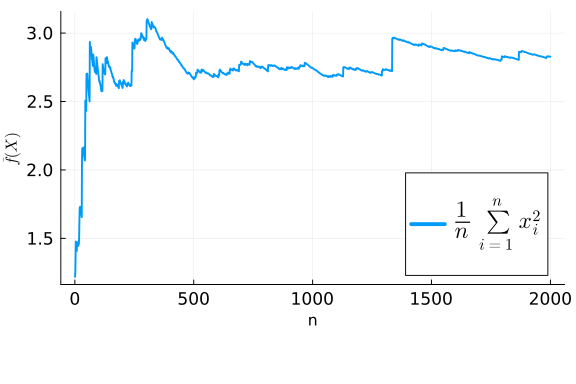

In [8]:
N = 2000
dist = Pareto(3.0, 1.0)
@show var(dist) + mean(dist)^2
x_draws = rand(dist, N)
f_x_draws = x_draws.^2
f_means = cumsum(f_x_draws)./(1:N)
plot(1:length(f_means), f_means;
     label=L"\frac{1}{n}\sum_{i=1}^n x_i^2",
     xlabel="n", ylabel=L"\bar{f}(X)",
     size=(600,400))

## Example with Pareto and $\alpha = 1.0$


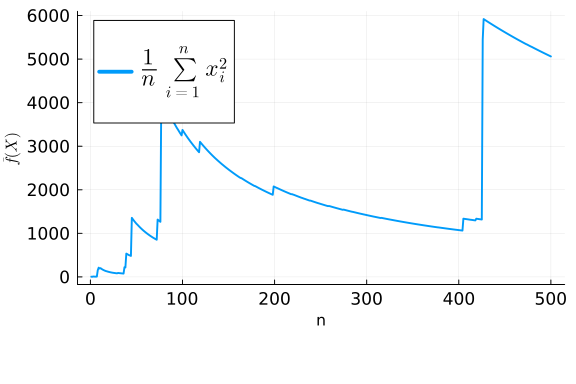

In [9]:
N = 500
dist = Pareto(1.0, 1.0)
x_draws = rand(dist, N)
f_x_draws = x_draws.^2
f_means = cumsum(f_x_draws)./(1:N)
plot(1:length(f_means), f_means;
     label=L"\frac{1}{n}\sum_{i=1}^n x_i^2",
     xlabel="n", ylabel=L"\bar{f}(X)",
     size=(600,400))

# Empirical Tails

## Empirical Evidence of Tails

-   It is sometimes difficult, with finite data, to distinguish between
    a heavy-tailed distribution and a light-tailed one
-   The issue is that in either case there are typically not that many
    observations with large values, even if there are more for
    power-laws.
-   Some classic examples of power-law tails in the data
    -   All from [Heavy-Tailed
        Distributions](https://intro.quantecon.org/heavy_tails.html) by
        Stachurski and Sargent

## Largest 500 firms in 2020 taken from Forbes Global 2000

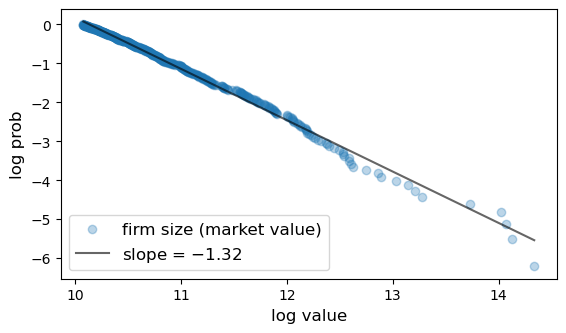

## City Sizes in the US and Brazil

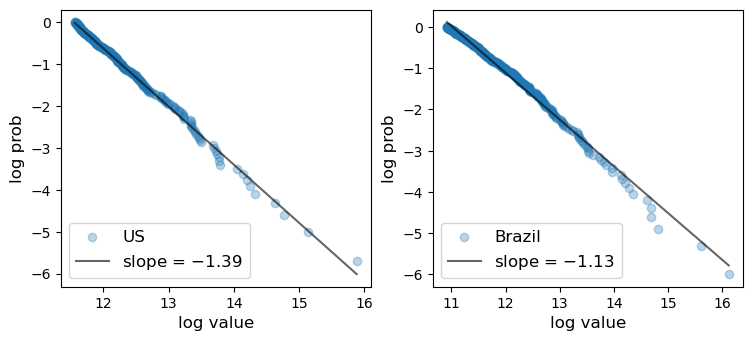

## Wealth Distribution Across Countries

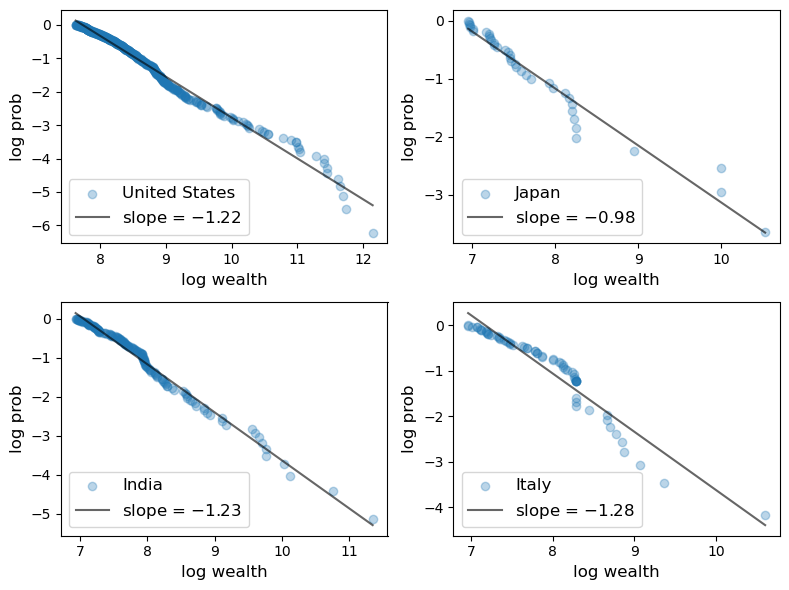

## GDP Across Countries

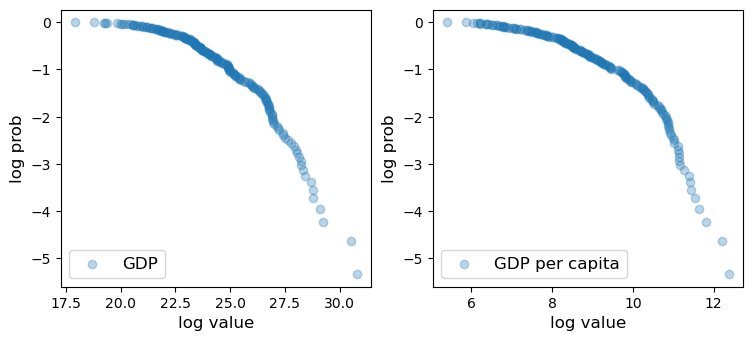

# Lorenz Curves and Gini Coefficients

## Visualizing Inequality

-   Tails are helpful for seeing how inequality is distributed at the
    top-end (e.g., the top 1% or 0.1%)
    -   They can also help us understand processes which might generate
        inequality
    -   For example, Kesten processes, which we will come back to, are a
        class of processes which generate power-law tails
    -   This can influence tax policy/etc.
-   However, the tail behavior is not very useful to understand
    inequality in the lower parts of the distribution

## Lorenz Curves

-   One popular graphical measure of inequality is the [Lorenz
    curve](https://en.wikipedia.org/wiki/Lorenz_curve).
-   For a continuous distribtuion with pdf $f(x)$, cdf $F(x)$, and
    quantile $x = F^{-1}(p)\equiv Q(p)$

$$
L(p) = \frac{\int_{-\infty}^{Q(p)} x f(x) dx}{\int_{-\infty}^{\infty} x f(x) dx}
$$

-   Which can be rewritten as
    $L(p) = \frac{\int_{0}^{p} Q(s) ds}{\int_{0}^{1} Q(s) ds}$
-   Intuition: the proportion of the population with less than $p$ of
    the total income has $L(p)$ of the total income

## Lorenz Curve for Discrete Data

-   In the case of [unweighted discrete
    data](https://en.wikipedia.org/wiki/Lorenz_curve#Definition_and_calculation)
    we have a simple empirical version of the Lorenz curve.
    [Weighted](https://en.wikipedia.org/wiki/Lorenz_curve#Definition_and_calculation)
    versions are useful if you bin data (e.g. quintiles)
-   Given **sorted** $v_1, \ldots v_N$, we find the empirical CDF with
    $$
    F_i \equiv \frac{i}{n}
    $$
-   Then the Lorenz curve is $$
    \begin{aligned}
    S_i &= \frac{1}{n}\sum_{j=1}^i v_j \\
    L_i &= \frac{S_i}{S_n}
    \end{aligned}
    $$

## Implementation


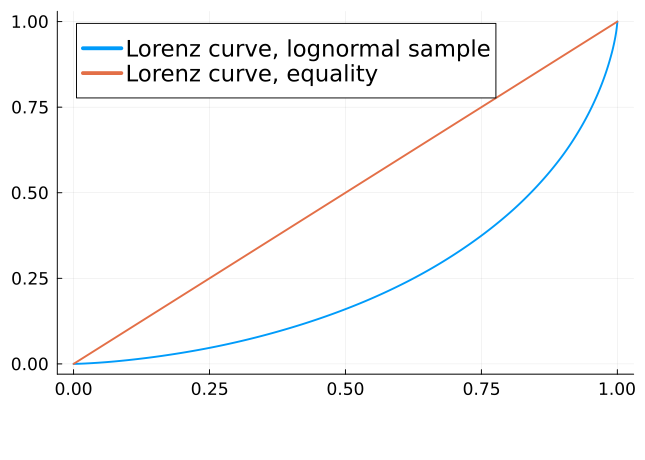

In [10]:
function lorenz(v)  # assumed sorted vector
    S = cumsum(v)  # cumulative sums: [v[1], v[1] + v[2], ... ]
    F = (1:length(v)) / length(v) # empirical CDF since everyone has the same weight!
    L = S ./ S[end]
    return (; F, L) # returns named tuple
end
n = 10_000
w = sort(exp.(randn(n)));  # lognormal draws
(; F, L) = lorenz(w)
plot(F, L, label = "Lorenz curve, lognormal sample", legend = :topleft)
plot!(F, F, label = "Lorenz curve, equality")

## With Cruder Samples Still Fairly Smooth


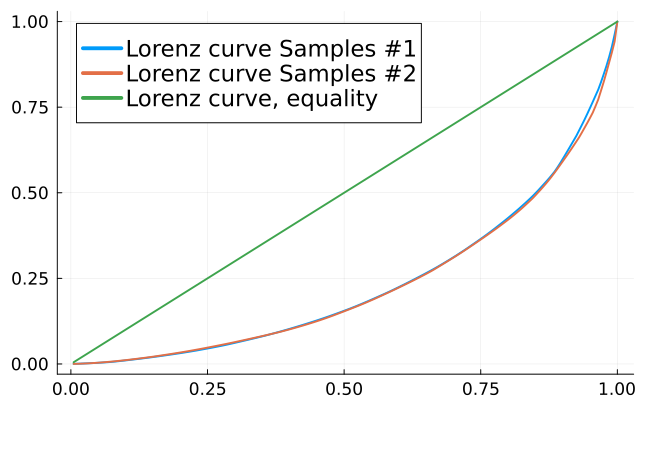

In [11]:
n = 200
w = sort(exp.(randn(n)));  # lognormal draws
(; F, L) = lorenz(w)
plot(F, L, label = "Lorenz curve Samples #1", legend = :topleft)
w = sort(exp.(randn(n)));  # lognormal draws
(; F, L) = lorenz(w)
plot!(F, L, label = "Lorenz curve Samples #2")
plot!(F, F, label = "Lorenz curve, equality")

## Interpretation

-   if point $(x,y)$ lies on the curve, it means that, collectively, the
    bottom $(100x)\%$ of the population holds $(100y)\%$ of the wealth.
-   The “equality” line is the 45 degree line, i.e. the Lorenz curve
    under perfect equality.
-   In this example, the bottom 80% of the population holds around 40%
    of total wealth.

## Lorenz Curve for Pareto

-   Can verify analytically that $L(p) = 1 - (1- p)^{1 - 1/\alpha}$ for
    the Pareto distribution


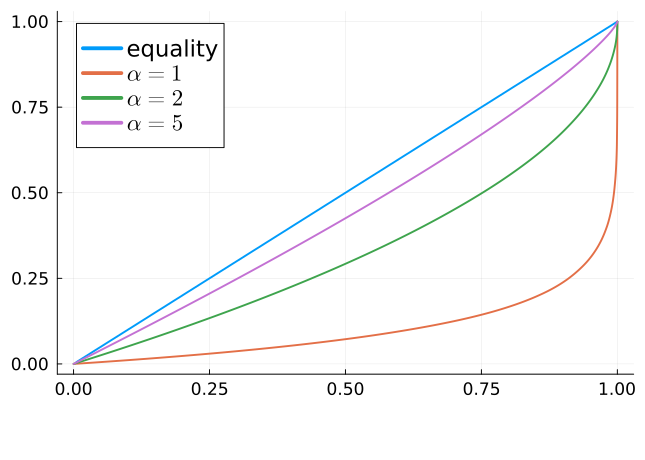

In [12]:
a_vals = (1, 2, 5)
n = 10_000
plt = plot(F, F, label = "equality", legend = :topleft)
for a in a_vals
    u = rand(n)
    y = sort(rand(Pareto(a, 1.0), n))
    (; F, L) = lorenz(y)
    plot!(plt, F, L, label = L"\alpha = %$a")
end
plt

## Gini Coefficients

-   The [Gini
    Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) is a
    summary measure of the Lorenz curve
    -   It is calcualted as the integral between the Lorenz curve and
        the line of equality
    -   e.g. gini is zero if there is no inequality, and one if one
        person has all the wealth
-   With sorted, unweighted discrete set $\{v_1,\ldots v_n\}$ there is a
    [simplification](https://en.wikipedia.org/wiki/Gini_coefficient#Alternative_expressions)

$$
G = \frac{2\sum_{i=1}^n i v_i}{n \sum_{i=1}^n v_i} - \frac{n+1}{n}
$$

## Calculation and Comparison to Theoretical

-   The [Weibull
    distribution](https://en.wikipedia.org/wiki/Weibull_distribution),
    $f(x) = a x^{a-1} e^{-x^a}$, has a Gini coefficient of $1 - 2^{1/a}$


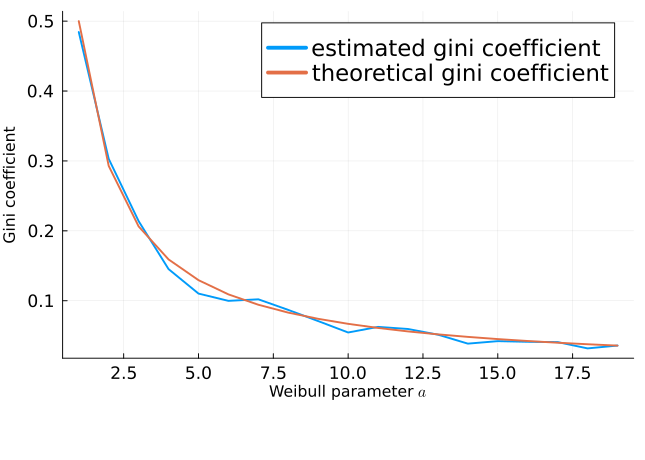

In [13]:
function gini(v)
    return (2 * sum(i * y for (i, y) in enumerate(v)) / sum(v)
           - (length(v) + 1)) / length(v)
end

a_vals = 1:19
n = 100
ginis = [gini(sort(rand(Weibull(a), n))) for a in a_vals]
ginis_theoretical = [1 - 2^(-1 / a) for a in a_vals]

plot(a_vals, ginis, label = "estimated gini coefficient",
     xlabel = L"Weibull parameter $a$", ylabel = "Gini coefficient")
plot!(a_vals, ginis_theoretical, label = "theoretical gini coefficient")